In [1]:
using CairoMakie

In [2]:
include("beyond_golden_ratio/utils/runner.jl")
include("beyond_golden_ratio/utils/methods.jl")
include("beyond_golden_ratio/utils/utils.jl")
include("beyond_golden_ratio/problems/problems.jl")

generate_F_QP (generic function with 1 method)

### Tuned Ploting Method

In [3]:
function plot_iterates(data, VI::AbstractVI, path, num_mark=10)
    """Plot trajectory of iterates (only possible if problem is 2-d)"""

    F = VI.F
    fig = Figure()
    ax = Axis(fig[1, 1],
    xticklabelsize = 16,
    yticklabelsize = 16
    )
    n = length(data)
    for (k, alg) in enumerate(data)
        mat = reshape(alg.iterates, 2, :)
        x = convert(Vector{Float64}, mat[1, :])
        y = convert(Vector{Float64}, mat[2, :])
        clamp!(x, -10, 10)
        clamp!(y, -10, 10)
        my_scatterline!(ax, x, y, k, n, num_mark, alg.label)
    end

    minval = -1.5
    maxval = 1.5
    if occursin("nonconvex-linear", path); maxval = 2 end
    if occursin("follow-the-ridge", path); minval, maxval = -5, 5 end
    f(u) = Point2f(-F(u))
    streamplot!(ax, f, minval..maxval, minval..maxval, linewidth=0.4)
    xlims!(minval, maxval)
    ylims!(minval, maxval)

    axislegend(labelsize = 12, merge = true)
    
    return fig
end

plot_iterates (generic function with 2 methods)

In [4]:
function norm_grad_plot(data, num_mark=6)
    fig = Figure()

    ax = Axis(fig[1, 1],
        xlabel = "operator evaluations",
        ylabel = "squared operator norm",
        xlabelsize = 20,
        ylabelsize = 20,
        xticklabelsize = 16,
        yticklabelsize = 16,
        yscale = log10,
        )

    n = length(data)

    for (k, alg) in enumerate(data)
        x = alg.x_ticks
        y = alg.store_grad
        my_scatterline!(ax, x, y, k, n, num_mark, alg.label)
    end

    axislegend(
        labelsize = 13,
        merge = true)

    return fig
end

norm_grad_plot (generic function with 2 methods)

In [5]:
function norm_grad_plotf1(data, num_mark=6)
    fig = Figure()

    ax = Axis(fig[1, 1],
        xlabel = "operator evaluations",
        ylabel = "squared operator norm",
        xlabelsize = 20,
        ylabelsize = 20,
        xticklabelsize = 16,
        yticklabelsize = 16,
        yscale = log10,
        )

    n = length(data)

    for (k, alg) in enumerate(data)
        x = alg.x_ticks
        y = alg.store_grad
        
        valid_inds = findall(y .>= 1e-15)
        x_filtered = x[valid_inds]
        y_filtered = y[valid_inds]
        
        my_scatterline!(ax, x_filtered, y_filtered, k, n, num_mark, alg.label)    end

    axislegend(
        labelsize = 13,
        merge = true)

    return fig
end

norm_grad_plotf1 (generic function with 2 methods)

In [6]:
function norm_grad_plotf3(data, num_mark=6)
    fig = Figure()

    ytick_vals = 10 .^ (0:-0.5:-2)
    ytick_labels = ["10⁻⁰⋅⁰", "10⁻⁰⋅⁵", "10⁻¹", "10⁻¹⋅⁵", "10⁻²⋅⁰"]

    ax = Axis(fig[1, 1],
        xlabel = "operator evaluations",
        ylabel = "squared operator norm",
        xlabelsize = 20,
        ylabelsize = 20,
        xticklabelsize = 16,
        yticklabelsize = 16,
        yscale = log10,
        yticks = (ytick_vals, ytick_labels))


    n = length(data)

    for (k, alg) in enumerate(data)
        x = alg.x_ticks
        y = alg.store_grad
        my_scatterline!(ax, x, y, k, n, num_mark, alg.label)
    end

    ylims!(1e-2*0.9, 2)

    axislegend(
        labelsize = 13,
        merge = true)

    return fig
end

norm_grad_plotf3 (generic function with 2 methods)

In [7]:
function norm_grad_plotf4(data, num_mark=6)
    fig = Figure()

    ytick_vals = 10.0 .^ (0:-5:-15)
    ytick_labels = ["10⁰", "10⁻⁵", "10⁻¹⁰", "10⁻¹⁵"]

    ax = Axis(fig[1, 1],
        xlabel = "operator evaluations",
        ylabel = "squared operator norm",
        xlabelsize = 20,
        ylabelsize = 20,
        xticklabelsize = 16,
        yticklabelsize = 16,
        yscale = log10,
        yticks = (ytick_vals, ytick_labels))


    n = length(data)

    for (k, alg) in enumerate(data)
        x = alg.x_ticks
        y = alg.store_grad

        valid_inds = findall(y .>= 1e-15)
        x_filtered = x[valid_inds]
        y_filtered = y[valid_inds]

        my_scatterline!(ax, x_filtered, y_filtered, k, n, num_mark, alg.label)
    end

    ylims!(10^-16, 100)

    axislegend(
        labelsize = 13,
        merge = true)

    return fig
end

norm_grad_plotf4 (generic function with 2 methods)

In [8]:
function norm_grad_plotf5(data, num_mark=6)
    fig = Figure()

    ytick_vals = 10.0 .^ (0:-5:-15)
    ytick_labels = ["10⁰", "10⁻⁵", "10⁻¹⁰", "10⁻¹⁵"]

    ax = Axis(fig[1, 1],
        xlabel = "operator evaluations",
        ylabel = "squared operator norm",
        xlabelsize = 20,
        ylabelsize = 20,
        xticklabelsize = 16,
        yticklabelsize = 16,
        yscale = log10,
        yticks = (ytick_vals, ytick_labels))


    n = length(data)

    for (k, alg) in enumerate(data)
        x = alg.x_ticks
        y = alg.store_grad

        valid_inds = findall(y .>= 1e-15)
        x_filtered = x[valid_inds]
        y_filtered = y[valid_inds]

        my_scatterline!(ax, x_filtered, y_filtered, k, n, num_mark, alg.label)
    end

    ylims!(10^-16, 100)

    axislegend(
        labelsize = 13,
        merge = true)

    return fig
end

norm_grad_plotf5 (generic function with 2 methods)

In [9]:
function generate_lr_plot(data, L=missing, num_mark=6)
    """Plot the learning rates across iterations. Especially interesting for the adaptive methods."""

    fig = Figure()
    # ax = Axis(fig[1, 1], xlabel="operator evaluations", ylabel="step size", yscale=log10)
    ax = Axis(fig[1, 1], 
    xlabel="operator evaluations", 
    ylabel="step size",
    xlabelsize = 20,
    ylabelsize = 20,
    xticklabelsize = 16,
    yticklabelsize = 16
    )
    n = length(data)
    for (k, alg) in enumerate(data)
        inds = alg.lr .> 0
        x = alg.x_ticks[inds]
        y = alg.lr[inds]
        # my_scatterline!(ax, x, y, k, n, num_mark, alg.label)
        scatter!(ax, x, y, label=alg.label)
    end
    if !ismissing(L)
        x = data[1].x_ticks
        lines!(ax, x, 1/L*ones(length(x)); label="1/L", color=:grey, linestyle=:dash)
    end
    axislegend(labelsize = 13,
    merge=true)
    return fig
end

generate_lr_plot (generic function with 3 methods)

# Perform Plot

### Figure1

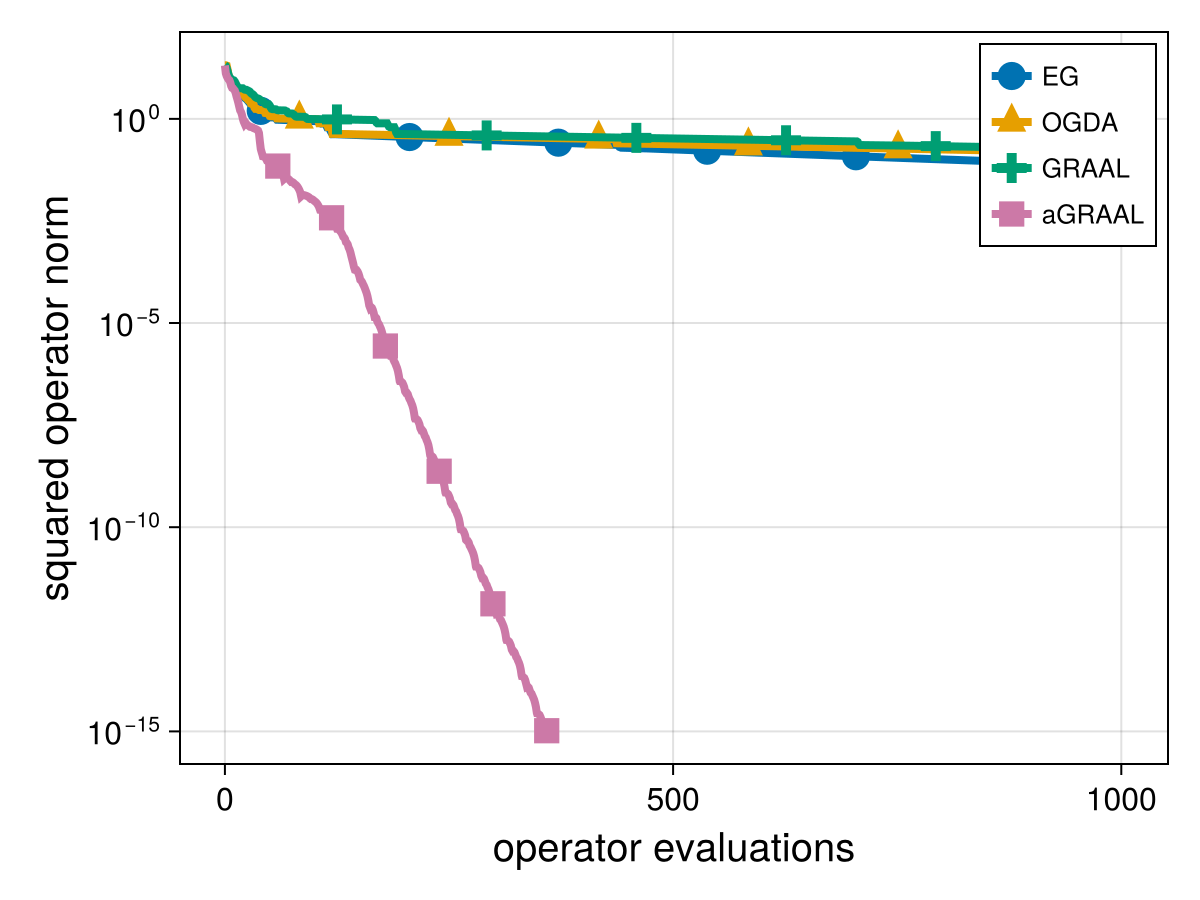

In [10]:
function policeman_burglar(n=50)

    folder_name = "policeman_burglar"
    n_grad_eval = 1000
    z0 = ones(2*n)/n

    Random.seed!(42)
    A = policeman_and_burglar_matrix(n)
    L = opnorm(A)

    problem = MatrixGame(A, proj_twice_simplex)
    params = ProblemParams(z0, n_grad_eval, folder_name, L, ρ=0)

    return problem, params, L
end

problemsf1 = [
    policeman_burglar()
]

algorithmsf1 = [algorithm(eg, "EG", (; γ=1.)),
    algorithm(ogda, "OGDA", (; γ=1.)),
    algorithm(golden_ratio, "GRAAL"),
    algorithm(golden_ratio, "aGRAAL", (; adaptive=true))
]

for prob in problemsf1
    VI, params = prob
    data = []
    for algo in algorithmsf1
        cb = Callback(label=algo.label)
        algo.method(VI, params, cb; algo.params...)
        push!(data, cb)
    end
    figure1 = norm_grad_plotf1(data)
    display(figure1)

    # save("plot/02/figure1.png", figure1)
end

### Figure2

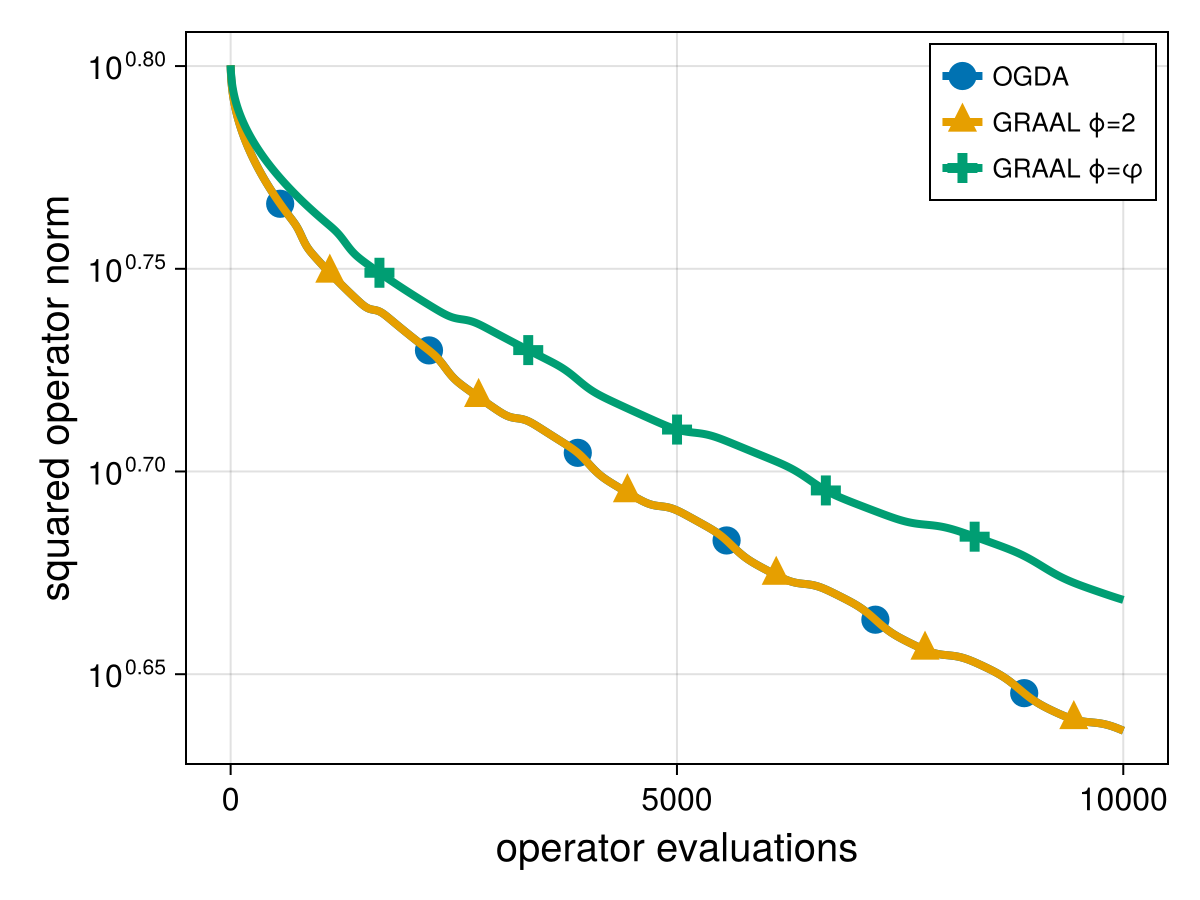

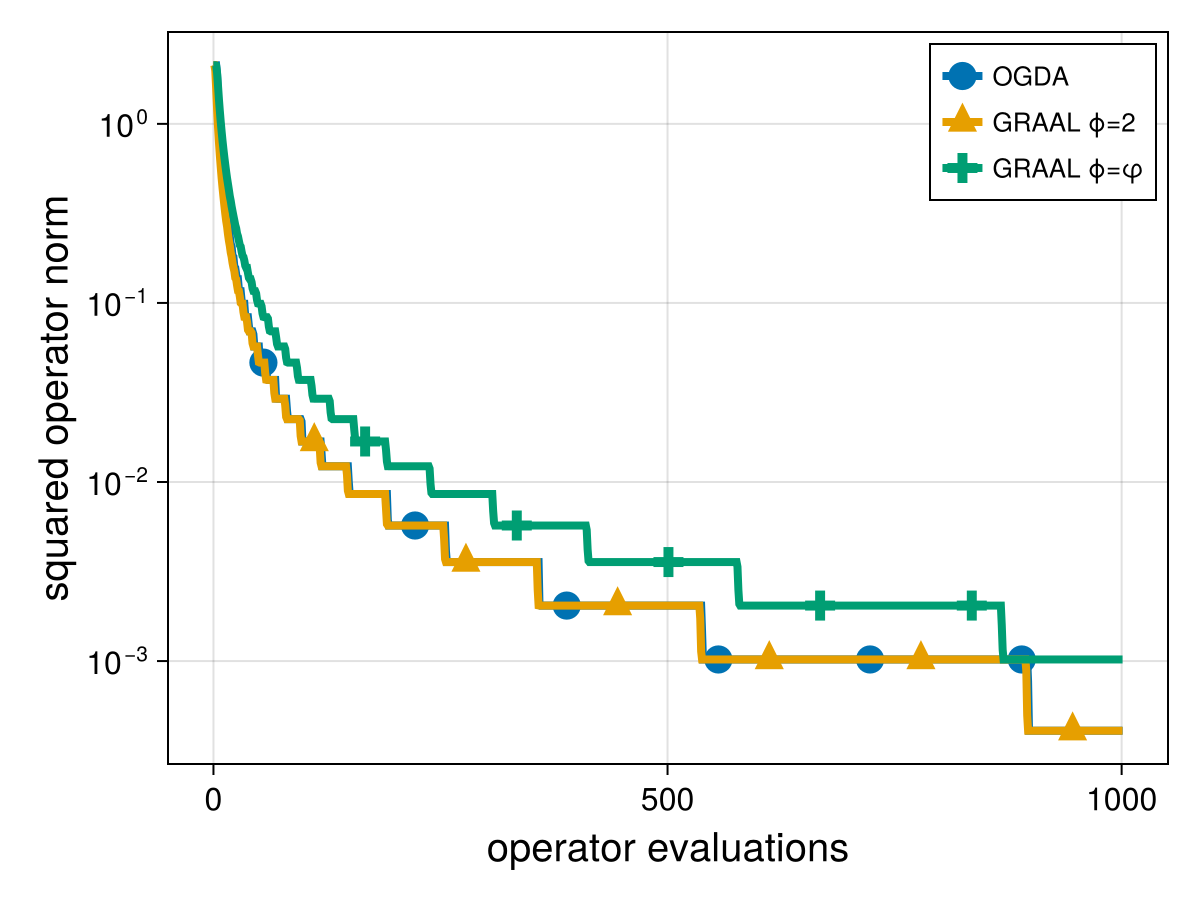

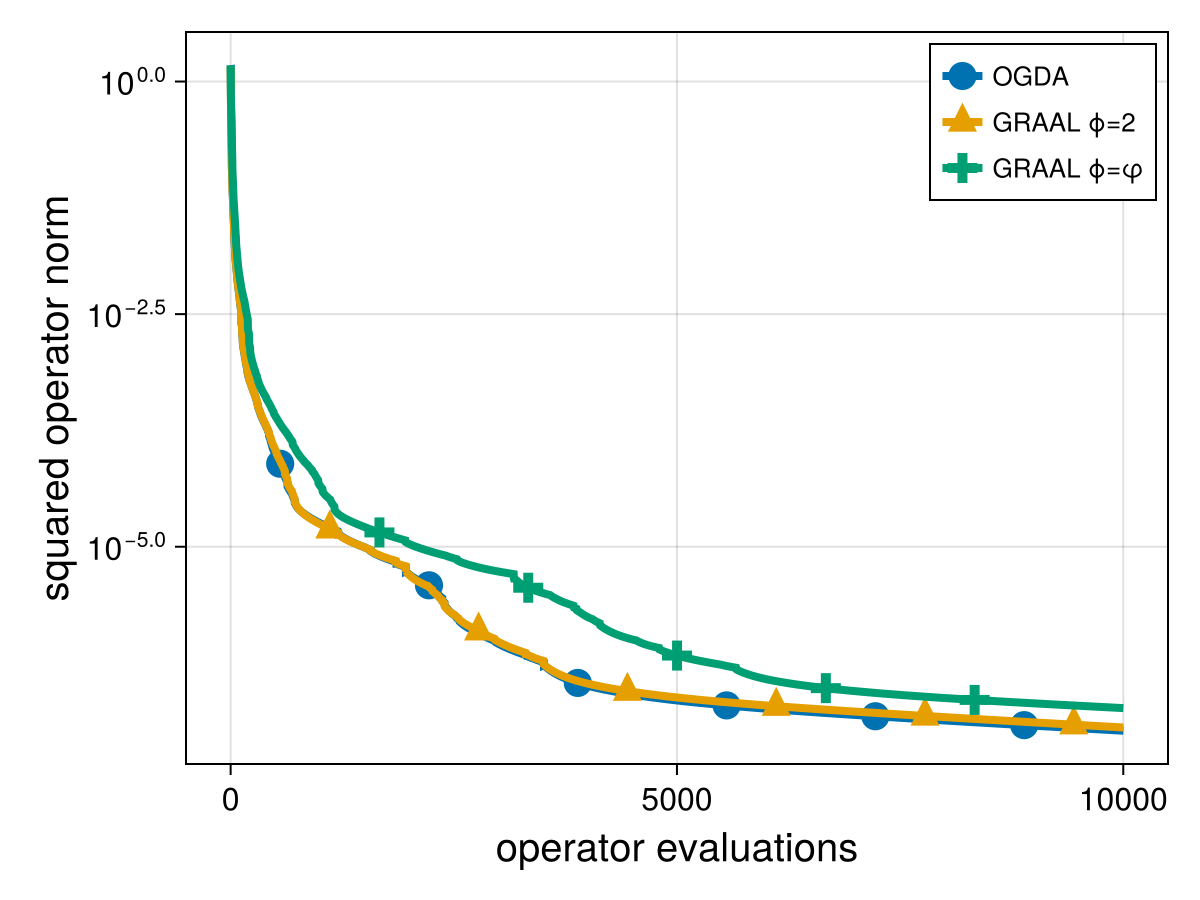

In [11]:
problemsf2 = [
    linearly_constrained_qp()
    gen_matrix_problem1()
    gen_random_matrix_game()
]

problem_names = ["leftfig2", "midfig2", "rightfig2"]

algorithmsf2 = [
    algorithm(ogda, "OGDA"),
    algorithm(golden_ratio, "GRAAL ϕ=2", (; ϕ=2.0)),
    algorithm(golden_ratio, "GRAAL ϕ=φ", (; ϕ=(1 + √5)/2))
]

for (i, prob) in enumerate(problemsf2)
    VI, params = prob
    data = []
    for algo in algorithmsf2
        cb = Callback(label=algo.label)
        algo.method(VI, params, cb; algo.params...)
        push!(data, cb)
    end
    figure2 = norm_grad_plot(data)
    display(figure2)

    # save("plot/02/$(problem_names[i]).png", figure2)
end


### Figure3

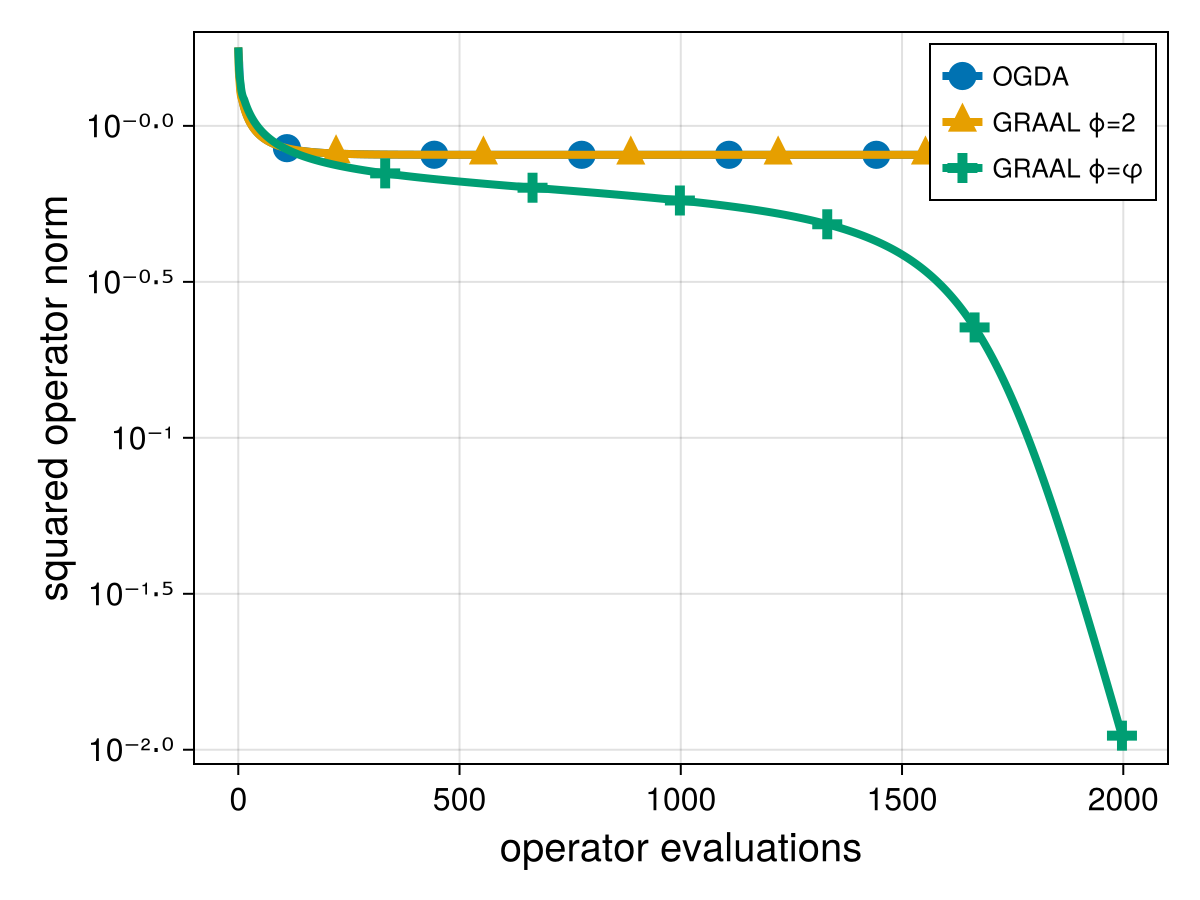

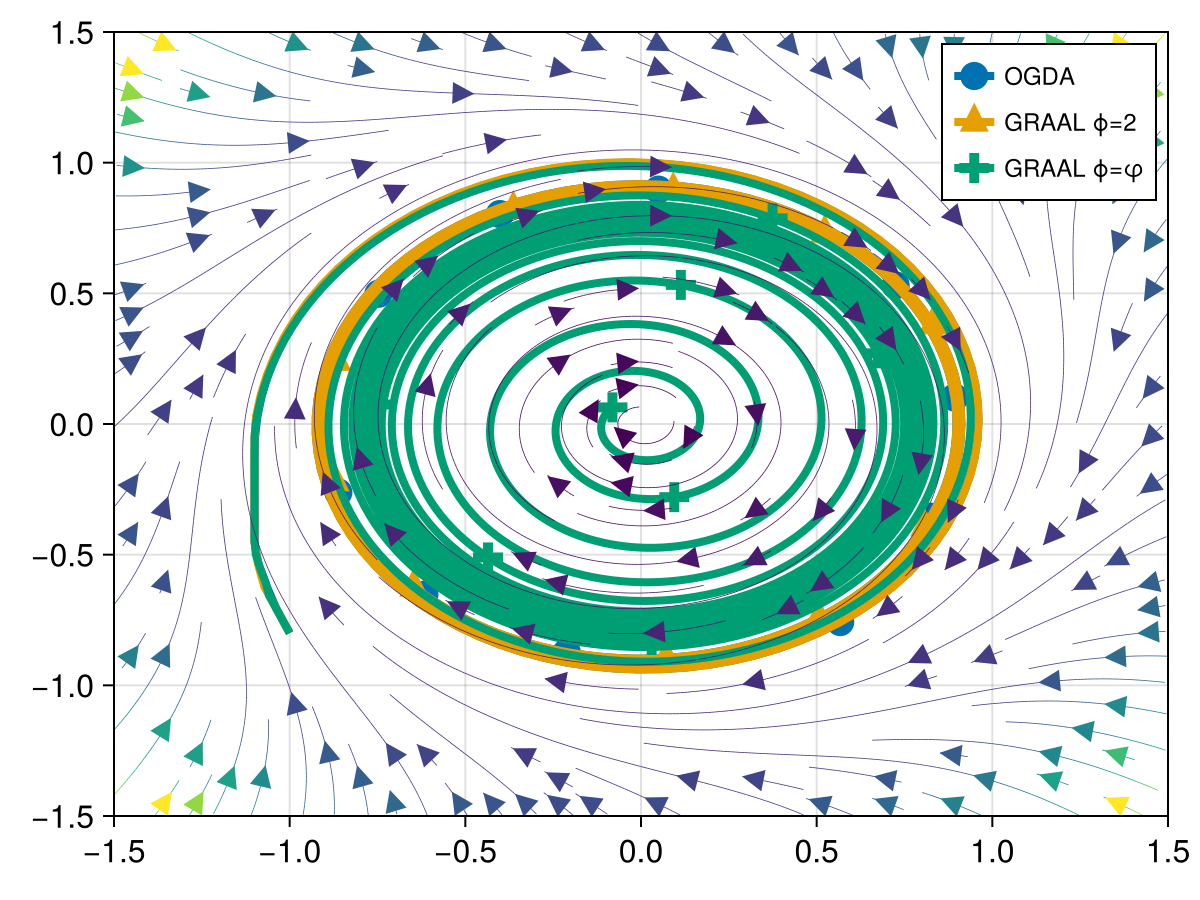

CairoMakie.Screen{IMAGE}


In [12]:
VI, params = polar_game(1/3, 2000)

algorithmsf3 = [
    algorithm(ogda, "OGDA"),
    algorithm(golden_ratio, "GRAAL ϕ=2", (; ϕ=2.0)),
    algorithm(golden_ratio, "GRAAL ϕ=φ", (; ϕ=(1 + √5)/2))
]

data = []

for algo in algorithmsf3
    cb = Callback(label=algo.label)
    algo.method(VI, params, cb; algo.params...)
    push!(data, cb)
end

leftfig3 = norm_grad_plotf3(data)
rightfig3 = plot_iterates(data, VI, params.path)

display(leftfig3)
display(rightfig3)

# save("plot/02/leftfig3.png", leftfig3)
# save("plot/02/rightfig3.png", rightfig3)

### Figure4

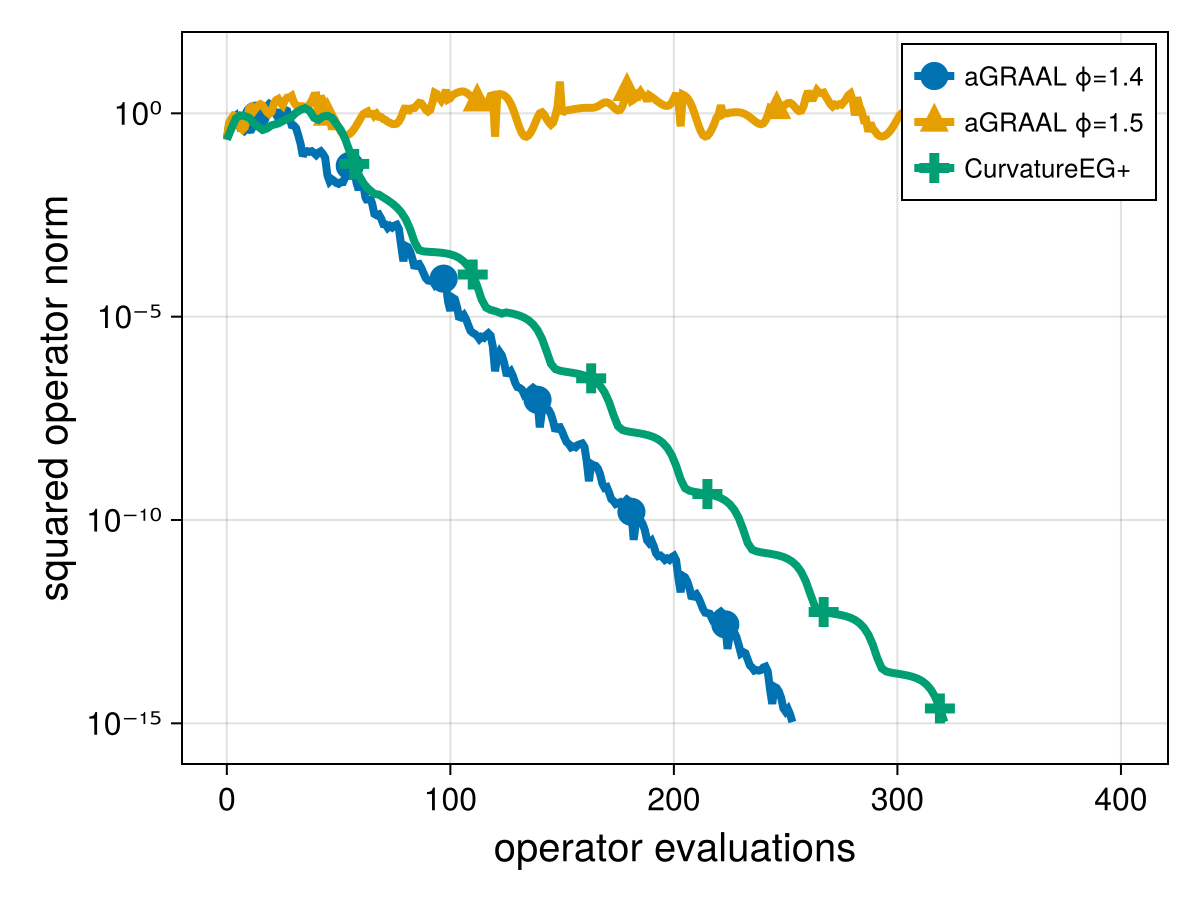

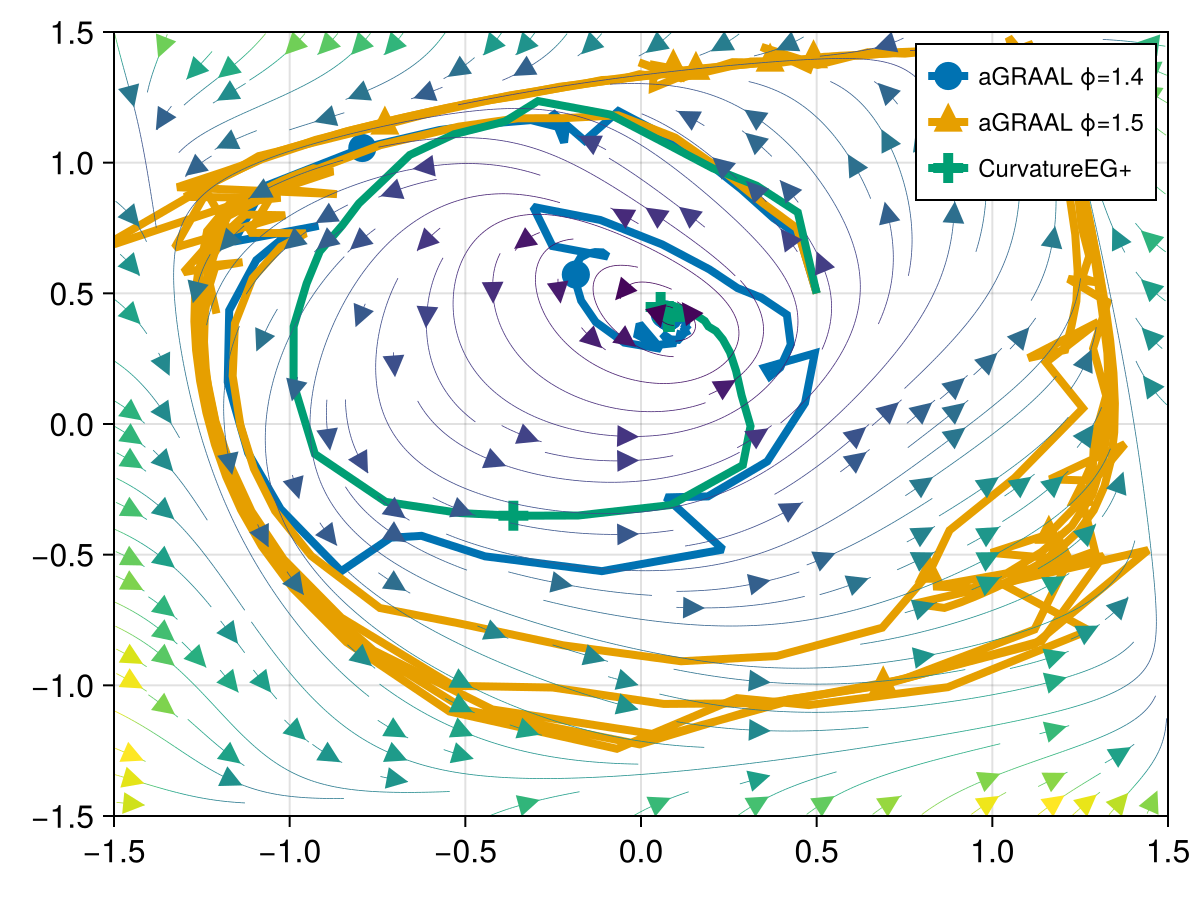

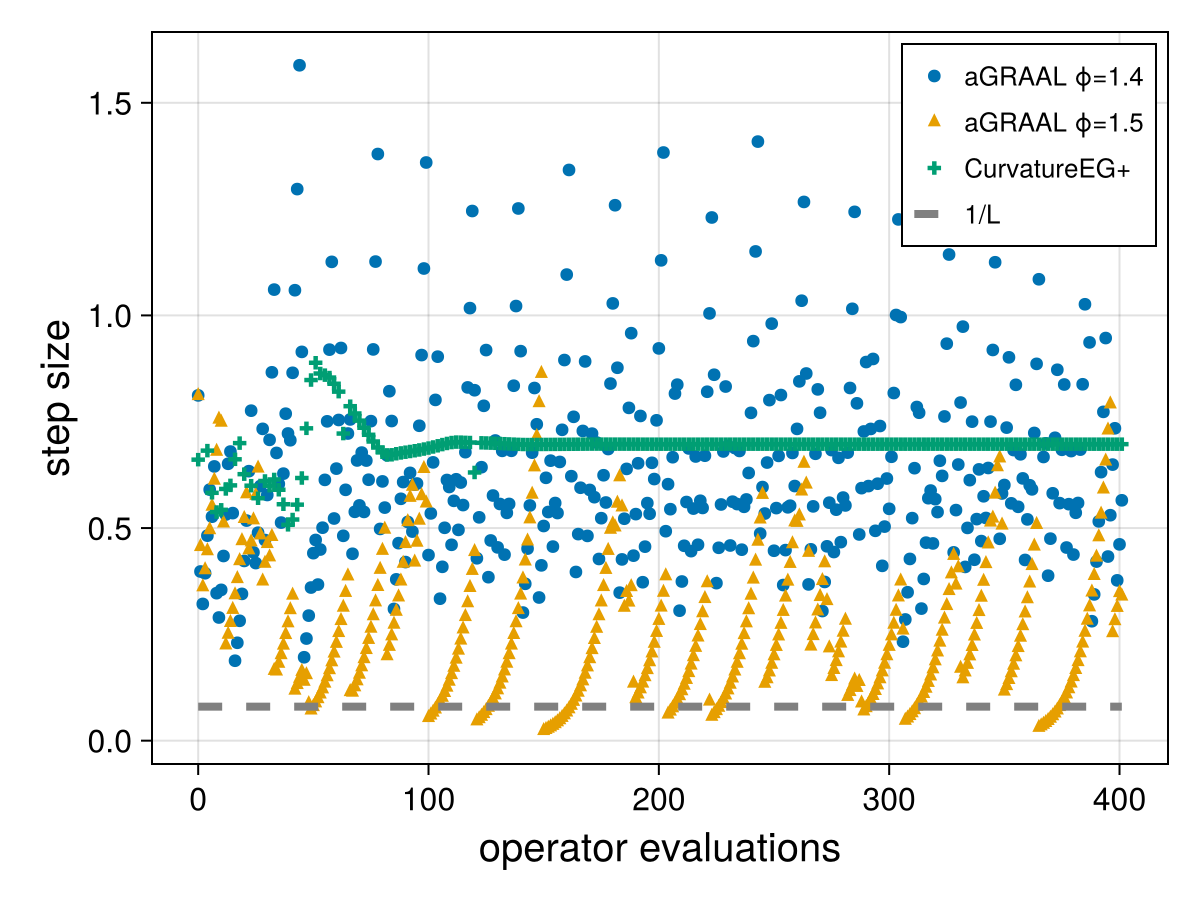

In [13]:
problemsf4 = [
    forsaken_difficult()
]

algorithmsf4 = [
    algorithm(golden_ratio, "aGRAAL ϕ=1.4", (; ϕ=1.4, adaptive=true)),
    algorithm(golden_ratio, "aGRAAL ϕ=1.5", (; ϕ=1.5, adaptive=true)),
    algorithm(adaptive_EG, "CurvatureEG+")
]

for prob in problemsf4
    VI, params = prob
    data = []
    for algo in algorithmsf4
        cb = Callback(label=algo.label)
        algo.method(VI, params, cb; algo.params...)
        push!(data, cb)
    end
    leftfig4 = norm_grad_plotf4(data)
    midfig4 = plot_iterates(data, VI, params.path)
    rightfig4 = generate_lr_plot(data, 1/0.08)
    display(leftfig4)
    display(midfig4)
    display(rightfig4)

    # save("plot/02/leftfig4.png", leftfig4)
    # save("plot/02/midfig4.png", midfig4)
    # save("plot/02/rightfig4.png", rightfig4)
end

### Figure5

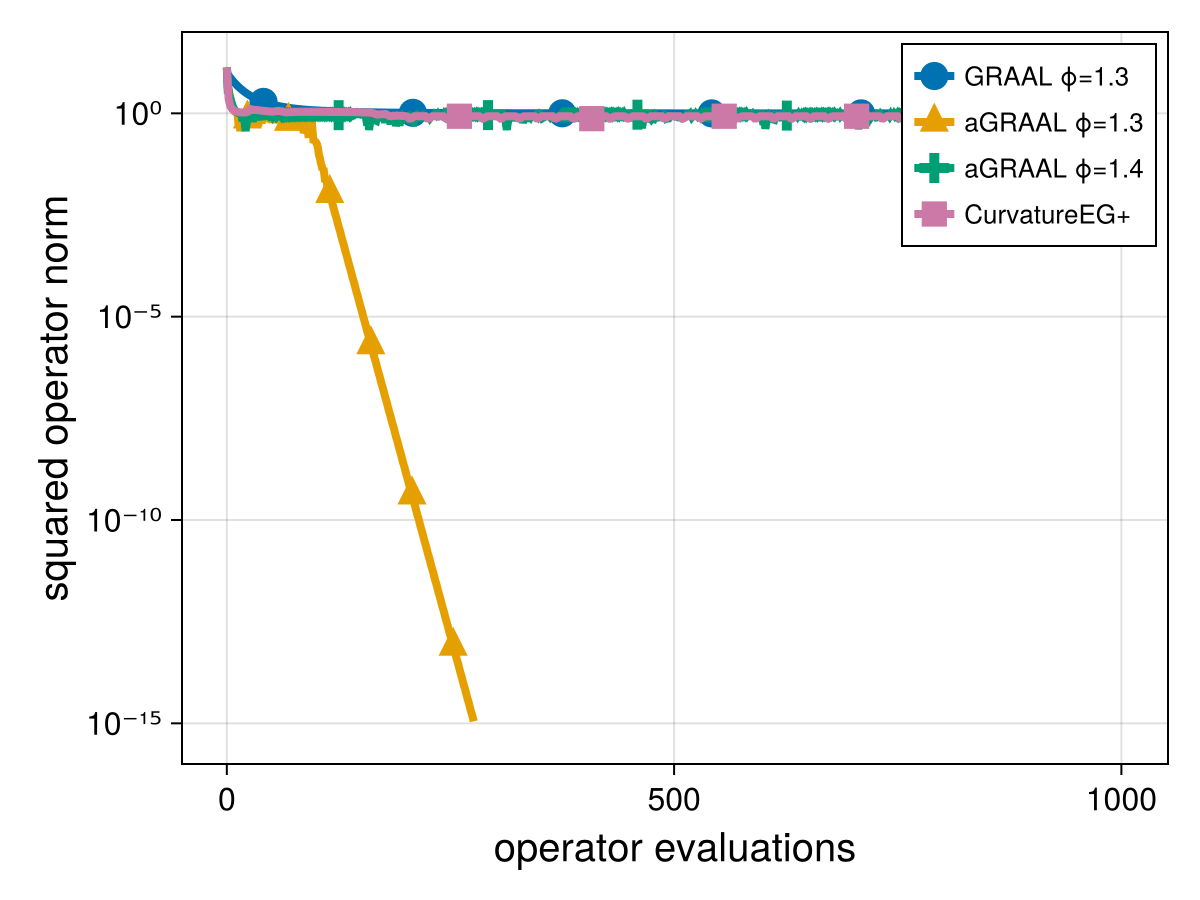

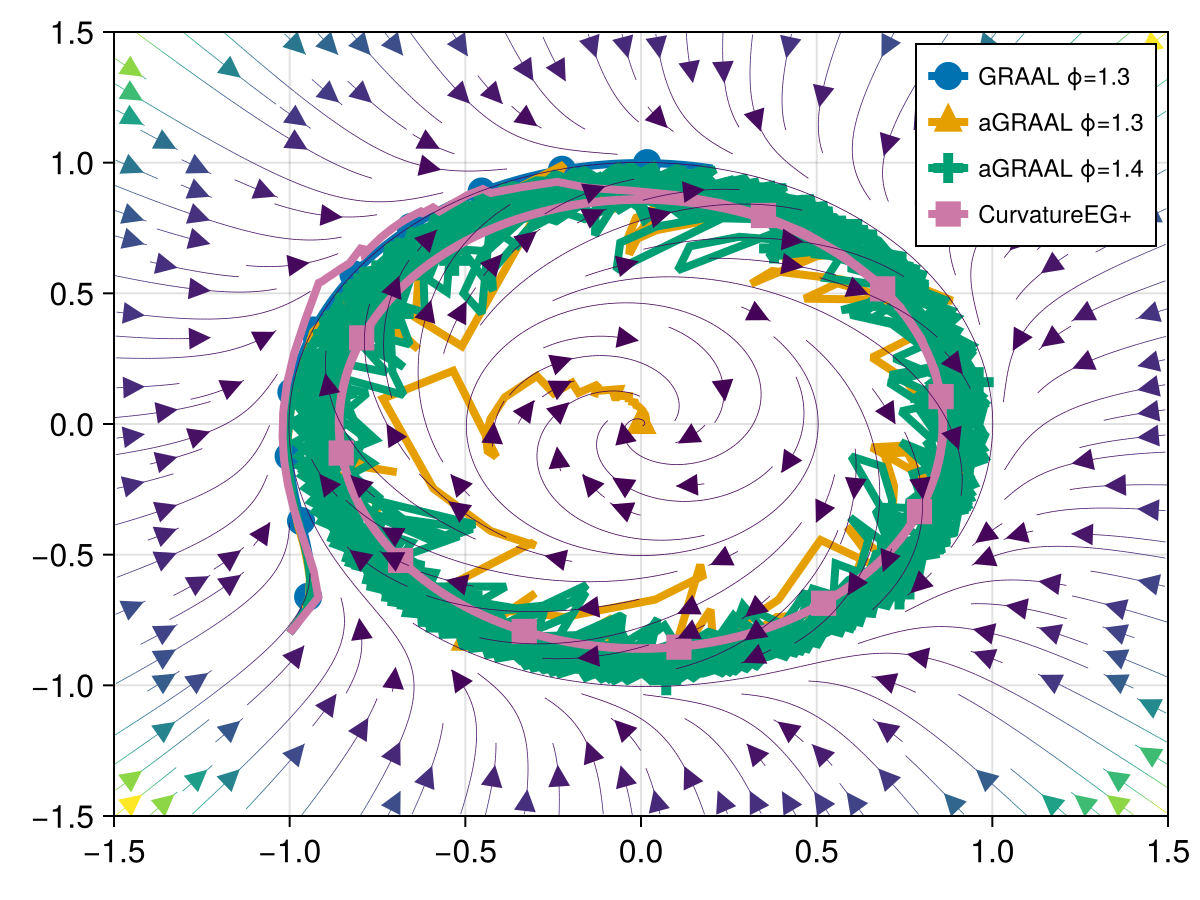

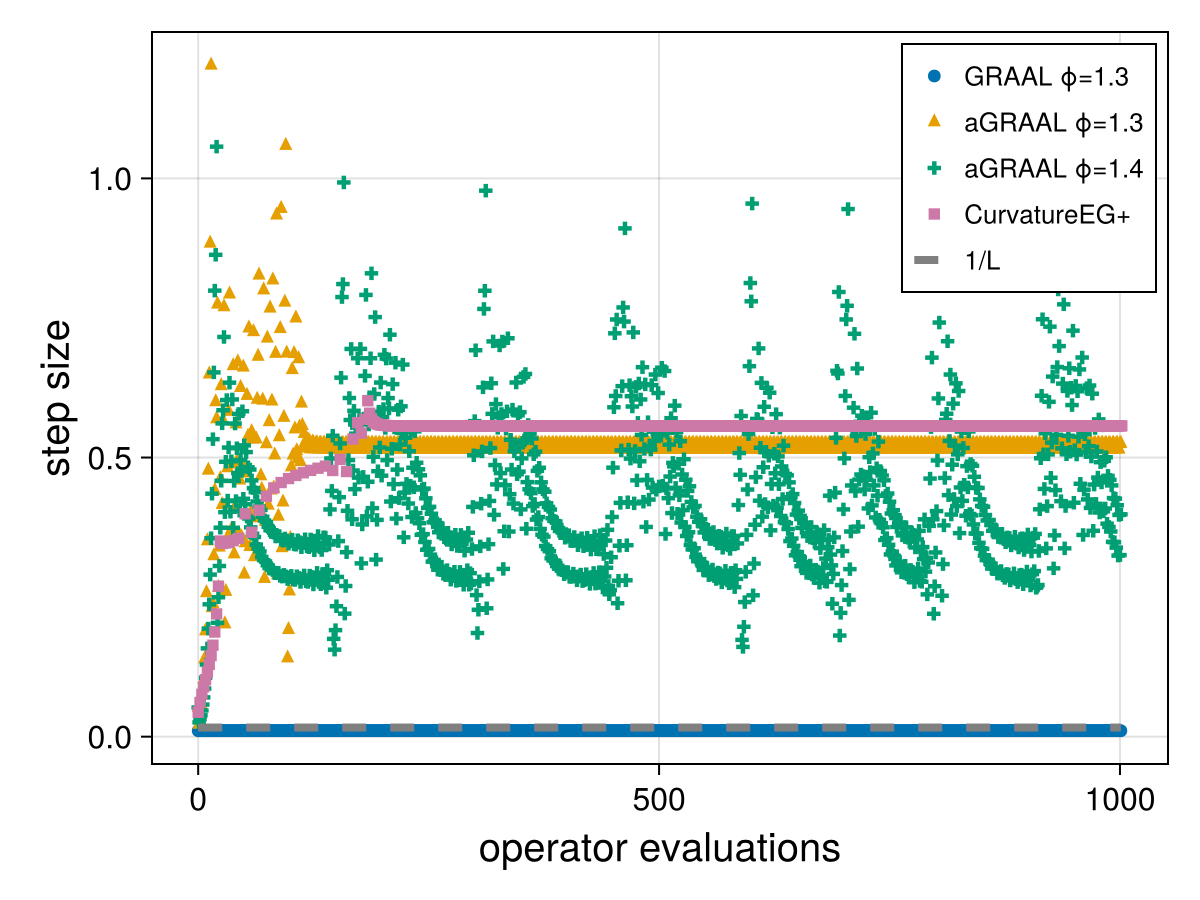

In [14]:
function polar_game(a, n_grad_eval=1000)
    """The larger a, the more difficult the problem becomes."""

    folder_name = f"Polar-Game a={a:.2f}"

    z0 = [-1., -0.8]
    sol = [0., 0.]

    proj(u) = clamp.(u, -11/10, 11/10)
    F, H = generate_polar(a)
    polar_game_VI = VariationalInequality(F, proj, sol=sol, H=H)
    L, ρ = compute_problem_params(polar_game_VI)
    params = ProblemParams(z0, n_grad_eval, folder_name, L, ρ=ρ)

    return polar_game_VI, params, L
end

problemsf5 = [
    polar_game(3)
]

algorithmsf5 = [
    algorithm(golden_ratio, "GRAAL ϕ=1.3", (; ϕ=1.3)),
    algorithm(golden_ratio, "aGRAAL ϕ=1.3", (; ϕ=1.3, adaptive=true)),
    algorithm(golden_ratio, "aGRAAL ϕ=1.4", (; ϕ=1.4, adaptive=true)),
    algorithm(adaptive_EG, "CurvatureEG+")
]

for prob in problemsf5
    VI, params, L = prob
    data = []
    for algo in algorithmsf5
        cb = Callback(label=algo.label)
        algo.method(VI, params, cb; algo.params...)
        push!(data, cb)
    end
    leftfig5 = norm_grad_plotf5(data)
    midfig5 = plot_iterates(data, VI, params.path)
    rightfig5 = generate_lr_plot(data, L)
    display(leftfig5)
    display(midfig5)
    display(rightfig5)

    # save("plot/02/leftfig5.png", leftfig5)
    # save("plot/02/midfig5.png", midfig5)
    # save("plot/02/rightfig5.png", rightfig5)
end

### Figure6

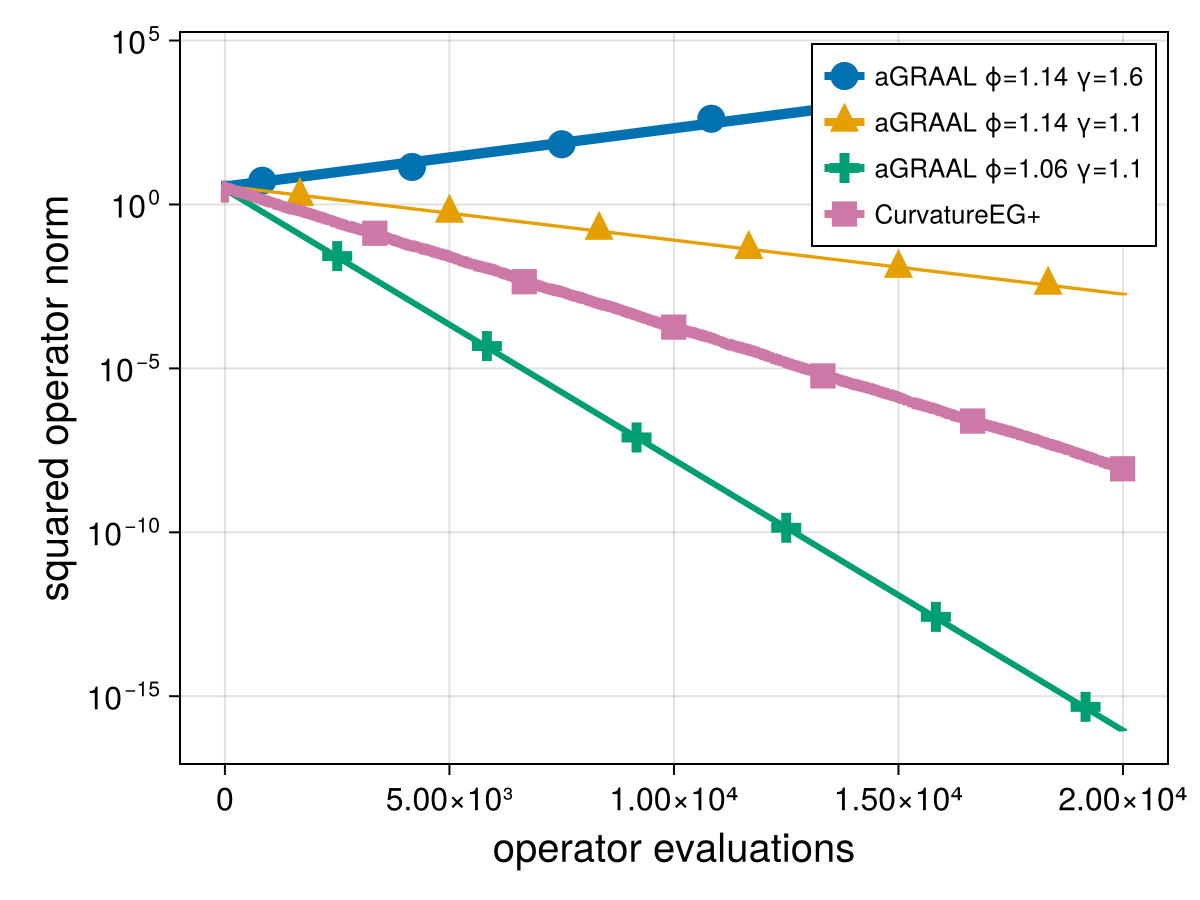

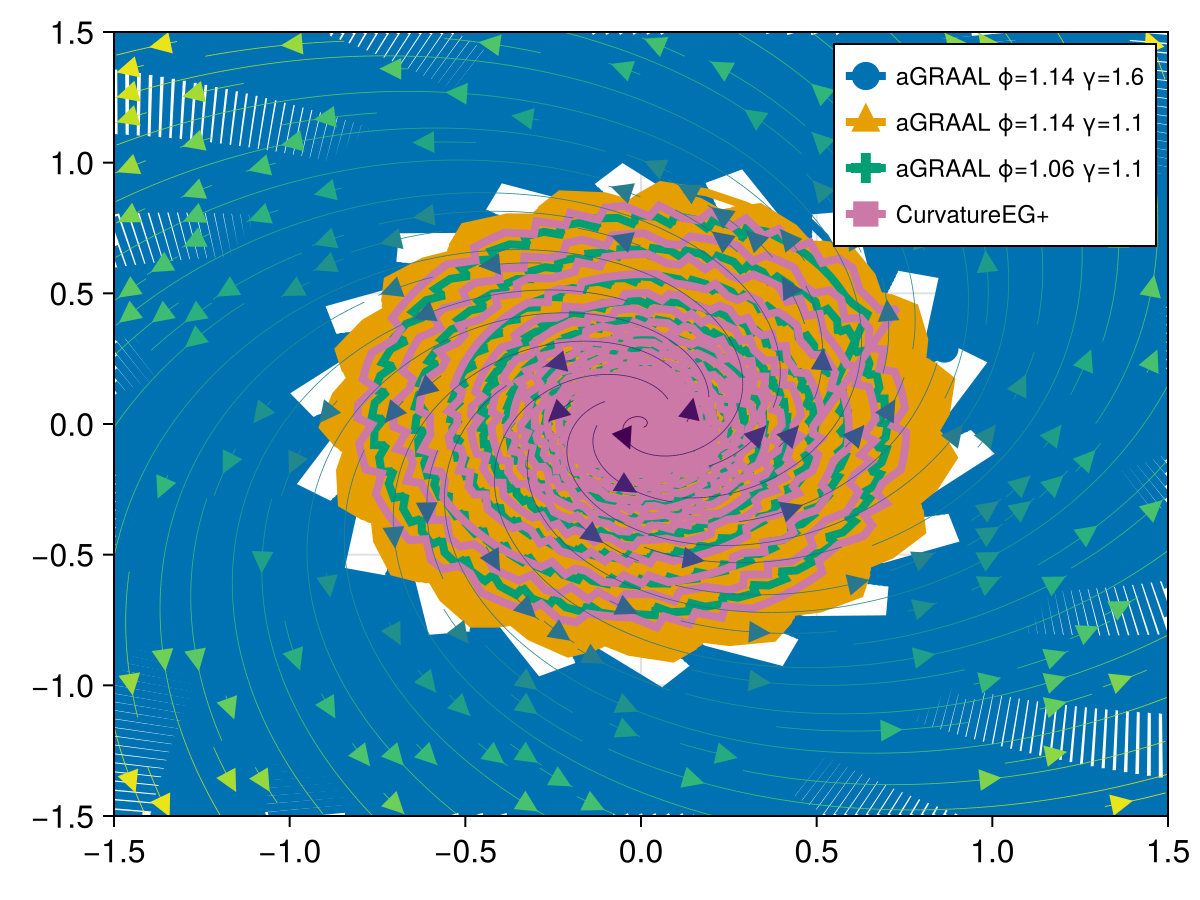

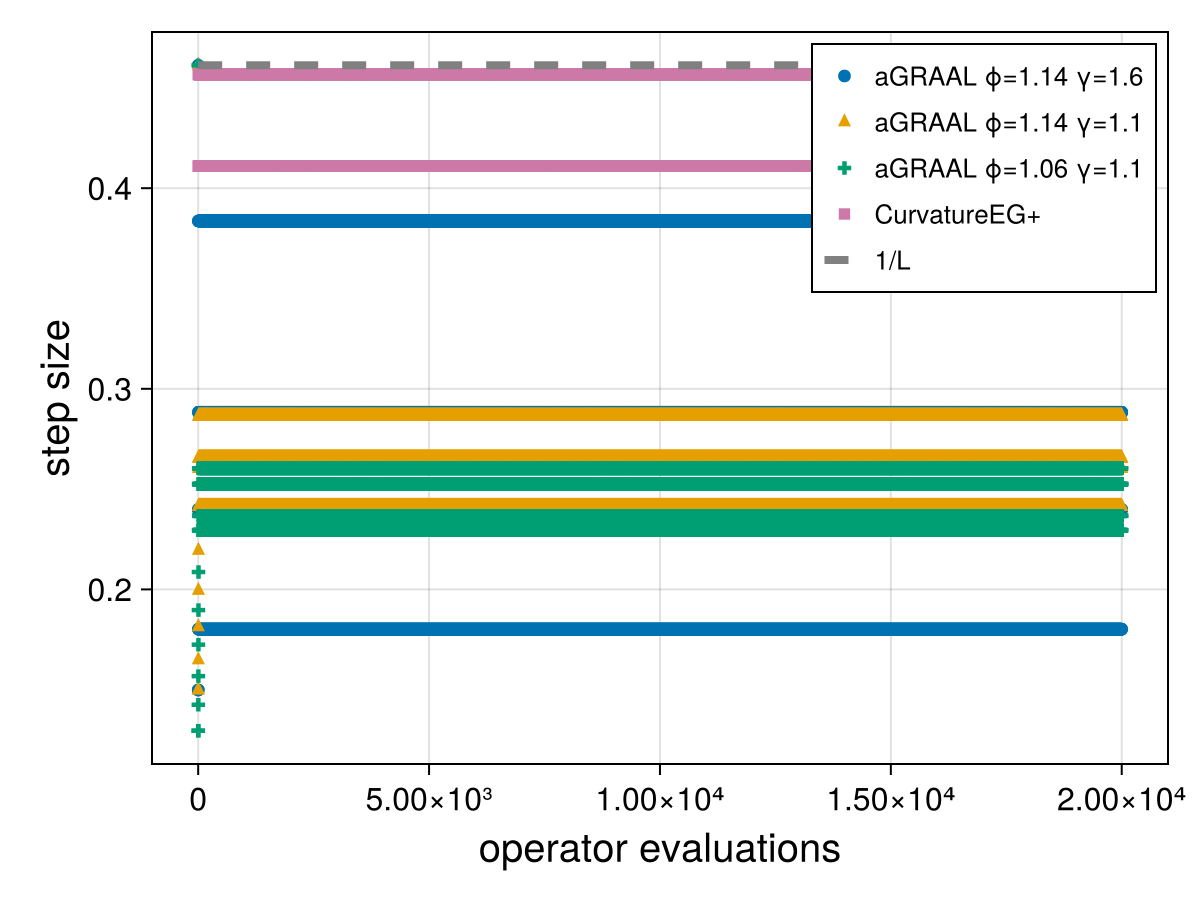

In [15]:
function lower_bound(param, n_grad_eval=2000)
    """param corresponds to a^2 and should be in (0, \\infty). The smaller it the
    more difficult the problem becomes."""

    z0 = [0.5, 0]
    sol = [0, 0]
    proj = identity

    a = sqrt(param)
    b = -1
    F, L, ρ, H = generate_F_lb(a, b)

    lower_bound = VariationalInequality(F, proj, sol=sol, H=H)
    folder_name = "lower-bound a=sqrt($(param))"

    params = ProblemParams(z0, n_grad_eval, folder_name, L, ρ=ρ)
    return lower_bound, params, L
end

problemsf6 = [
    lower_bound(3.7, 20000)
]

algorithmsf6 = [algorithm(golden_ratio, "aGRAAL ϕ=1.14 γ=1.6", (; ϕ=1.14, γ=1.6, adaptive=true)),
    algorithm(golden_ratio, "aGRAAL ϕ=1.14 γ=1.1", (; ϕ=1.14, γ=1.1, adaptive=true)),
    algorithm(golden_ratio, "aGRAAL ϕ=1.06 γ=1.1", (; ϕ=1.06, γ=1.1, adaptive=true)),
    algorithm(adaptive_EG, "CurvatureEG+")
]

for prob in problemsf6
    VI, params, L = prob
    data = []
    for algo in algorithmsf6
        cb = Callback(label=algo.label)
        algo.method(VI, params, cb; algo.params...)
        push!(data, cb)
    end
    leftfig6 = norm_grad_plot(data)
    midfig6 = plot_iterates(data, VI, params.path)
    rightfig6 = generate_lr_plot(data, L)
    display(leftfig6)
    display(midfig6)
    display(rightfig6)

    # save("plot/02/leftfig6.png", leftfig6)
    # save("plot/02/midfig6.png", midfig6)
    # save("plot/02/rightfig6.png", rightfig6)
end